In [24]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import pandas as pd
import pickle

In [9]:
url = 'https://www.naukri.com/mnc-jobs-1'

In [10]:
driver.get(url)

time.sleep(3)

<html data-theme="one-theme" lang="en">
 <head>
  <title>
   Mnc Jobs, 55219 Mnc Job Vacancies In June 2023 - Naukri.com
  </title>
  <meta content="Apply To 55219 Mnc Jobs On Naukri.com, #1 Job Portal In India. Explore Mnc Job Openings In Your Desired Locations Now!" name="description"/>
  <link href="android-app://naukriApp.appModules.login/https/www.naukri.com/mnc-jobs" rel="alternate"/>
  <link href="https://www.naukri.com/mnc-jobs" rel="canonical"/>
  <meta content="jobsearch" name="atdlayout"/>
  <meta content="ALL" name="robots"/>
  <meta content="Jobs &amp; Career: Job Search, Apply Jobs, Post Jobs" name="classification"/>
  <meta content="no-cache" name="pragma"/>
  <meta content="general" name="rating"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="GLOBAL" name="distribution"/>
  <meta content="document" name="resource-type"/>
  <meta content="www.naukri.com" name="author"/>
  <meta content="EN" name="content-language"/>
  <meta content="171330469593307" pr
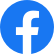
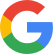

In [11]:
soup = BeautifulSoup(driver.page_source, 'lxml')

print(soup.prettify())



In [12]:
import pickle
#change the url to n = 10
for i in range(1,30):
    url_new = 'https://www.naukri.com/mnc-jobs-'+str(i) # + pagenumber
    driver.get(url_new)
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'lxml')
    with open(f"temp1{i}.pickle", "wb") as f:
        pickle.dump(soup, f)
        print(f"{i}th page done")
    
    

1th page done
2th page done
3th page done
4th page done
5th page done
6th page done
7th page done
8th page done
9th page done
10th page done
11th page done
12th page done
13th page done
14th page done
15th page done
16th page done
17th page done
18th page done
19th page done
20th page done
21th page done
22th page done
23th page done
24th page done
25th page done
26th page done
27th page done
28th page done
29th page done


In [13]:

driver.close()

In [14]:
df = pd.DataFrame(columns=['Title','Description','Skills','Company','Experience','Location','URL'])

In [76]:
results = soup.find(class_='list')

In [77]:
soups = results.find_all('article',class_='jobTuple')
type(soups)

bs4.element.ResultSet

In [17]:
# Configure Chrome options for headless browsing
chrome_options = Options()
chrome_options.add_argument("--headless")  # Enable headless mode

In [25]:
urls = []
df = pd.DataFrame(columns=['Title','Description','Skills','Company','Experience','Location','URL'])
for i in range(1,10):
    file = open(f"temp1{i}.pickle","rb")
    soup = pickle.load(file)
    results = soup.find(class_='list')
    job_elems = results.find_all('article',class_='jobTuple')
    # Iterate over each job element and scrape data from each page
    for job_elem in job_elems:
        # Title
        title = job_elem.find('a', class_='title ellipsis').text
        # print("Title:", title)
        # print(' ')

        # Job Description
        description = job_elem.find('div', class_='ellipsis job-description').text
        if description is None:
                description = job_elem.find('div', class_='clearboth description').text
        # print(description)
        # print(' ')

        # Company
        company = job_elem.find('a', class_='subTitle ellipsis fleft').text
        if company is None:
                company = job_elem.find('p', class_='cpName').text
        # print("Company:", company)
        # print(' ')

        # Experience
        experience = job_elem.find('span', class_='slide-meta-exp')
        if experience is None:
            experience = job_elem.find('span', class_='slide-meta-exp pull-left') 
            if experience is None:
                    experience = job_elem.find('div', class_='exp')
            if experience is not None:
                experience = experience.text.strip()
            else:
                experience = ""
        # print("Experience:", experience)
        # print(' ')

        # Salary
        salary = job_elem.find('li', class_='fleft br2 placeHolderLi salary').text
        # print("Salary:", salary)
        # print(' ')

        # Location
        location = job_elem.find('li', class_='fleft br2 placeHolderLi location').text
        # print("Location:", location)
        # print(' ')

        # URL
        article_url = job_elem.find('a', class_='title ellipsis').get('href')
        driver.get(article_url)
        
        # Wait for the page to fully load (add necessary wait time)
        time.sleep(1)
        
        # Get the page source
        page_source = driver.page_source
        
        # Create a BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')
        
        # Perform part 2 of your code
        key_skills_div = soup.find('div', class_='key-skill')
        if key_skills_div:
            skills = key_skills_div.find_all('a', class_='chip clickable')
            skill_list = [skill.text.strip() for skill in skills]
        else:
            skill_list = []
        # Go back to the previous page
        # response = requests.get(url)
        # soup = BeautifulSoup(response.content, 'html.parser')
        skill_list = ",".join(skill_list)
        print(skill_list)

        df=df.append({'URL':article_url,'Title':title,'Company':company,'Description':description,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)
    file.close()


CRO,Data migration,Project management,Pharma,Clinical research,Healthcare,Windows,MS Office,Project delivery,Public health


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19524\2155114894.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':article_url,'Title':title,'Company':company,'Description':description,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)


Presentation Skills,Channel Sales,Customer Relationship,Time Management


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19524\2155114894.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':article_url,'Title':title,'Company':company,'Description':description,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)


Software design,Data analysis,Quality improvement,Pharma,Project management,Clinical research,Healthcare,Macros,Public health


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19524\2155114894.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':article_url,'Title':title,'Company':company,'Description':description,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)


KeyboardInterrupt: 

In [21]:
chrome_driver_path = r"C:/Users/LENOVO/Desktop/Job Recommendation System/data/chromedriver.exe"

# Configure the ChromeDriver service
service = Service(chrome_driver_path)

# Start the WebDriver
driver = webdriver.Chrome(service=service)

In [28]:
urls = []
df = pd.DataFrame(columns=['Title','Description','Skills','Company','Experience','Location','URL'])
for i in range(1,40):
    file = open(f"temp{i}.pickle","rb")
    soup = pickle.load(file)
    results = soup.find(class_='list')
    job_elems = results.find_all('article',class_='jobTuple')
    # Iterate over each job element and scrape data from each page
    for job_elem in job_elems:
        # Title
        title = job_elem.find('a', class_='title ellipsis').text
        # print("Title:", title)
        # print(' ')

        # Job Description
        description = job_elem.find('div', class_='ellipsis job-description').text
        if description is None:
                description = job_elem.find('div', class_='clearboth description').text
        # print(description)
        # print(' ')

        # Company
        company = job_elem.find('a', class_='subTitle ellipsis fleft').text
        if company is None:
                company = job_elem.find('p', class_='cpName').text
        # print("Company:", company)
        # print(' ')

        # Experience
        experience = job_elem.find('span', class_='slide-meta-exp')
        if experience is None:
            experience = job_elem.find('span', class_='slide-meta-exp pull-left') 
            if experience is None:
                    experience = job_elem.find('div', class_='exp')
            if experience is not None:
                experience = experience.text.strip()
            else:
                experience = ""
        # print("Experience:", experience)
        # print(' ')

        # Salary
        salary = job_elem.find('li', class_='fleft br2 placeHolderLi salary').text
        # print("Salary:", salary)
        # print(' ')

        # Location
        location = job_elem.find('li', class_='fleft br2 placeHolderLi location').text
        # print("Location:", location)
        # print(' ')

        # URL
        article_url = job_elem.find('a', class_='title ellipsis').get('href')
        driver.get(article_url)
        
        # Wait for the page to fully load (add necessary wait time)
        time.sleep(1)
        
        # Get the page source
        page_source = driver.page_source
        
        # Create a BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')
        
        # Perform part 2 of your code
        key_skills_div = soup.find('div', class_='key-skill')
        if key_skills_div:
            skills = key_skills_div.find_all('a', class_='chip clickable')
            skill_list = [skill.text.strip() for skill in skills]
        else:
            skill_list = []
        # Go back to the previous page
        # response = requests.get(url)
        # soup = BeautifulSoup(response.content, 'html.parser')
        skill_list = ",".join(skill_list)
        print(skill_list)

        df=df.append({'URL':article_url,'Title':title,'Company':company,'Description':description,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)
    file.close()


FileNotFoundError: [Errno 2] No such file or directory: 'temp1.pickle'

In [ ]:
df.to_csv(r"C:\Users\LENOVO\Desktop\Job Recommendation System\data\scrap8.csv",index=False)

In [43]:
urls = []
df = pd.DataFrame(columns=['Title','Description','Skills','Company','Experience','Location','URL'])
for i in range(1,10):
    file = open(f"temp{i}.pickle","rb")
    soup = pickle.load(file)
    results = soup.find(class_='list')
    job_elems = results.find_all('article',class_='jobTuple')

    # Iterate over each job element and scrape data from each page
    for job_elem in job_elems:
        
        title = job_elem.find('a', class_='title ellipsis').text
        
        article_url = job_elem.find('a', class_='jd-header-title').get('href')
        driver.get(article_url)

        page_source = driver.page_source
        
        # Create a BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Title
        title = soup.find('h1', class_='title ellipsis').text
        if title is None:
             title = soup.find('h1',class_='av-special-heading-tag ').text
        print("Title:", title)
        print(' ')

        # Job Description
        description = soup.find('div', class_='dang-inner-html').text
        if description is None:
                description = job_elem.find('div', class_='clearboth description')
        print("Description:", description)
        print(' ')

        # Company
        company = soup.find('a', class_='jd-header-comp-name').text
        if company is None:
                company = soup.find('p', class_='cpName')
        print("Company:", company)
        print(' ')

        # Experience
        experience = soup.find('div', class_='exp')
        if experience is None:
            experience = soup.find('span', class_='slide-meta-exp')
            if experience is None:
                experience = soup.find('span', class_='slide-meta-exp pull-left')         
            if experience is not None:
                experience = experience.text.strip()
            else:
                experience = ""
        print("Experience:", experience)
        print(' ')

        # Salary
        salary = soup.find('div', class_='salary').text
        if salary is None:
             salary = soup.find('span',class_='job-meta slide-meta-sal')
        print("Salary:", salary)
        print(' ')

        # Location
        location = soup.find('span', class_='location').text
        if location is None:
             location = soup.find('a','slide-meta-loc pull-left')
        print("Location:", location)
        print(' ')


        # Perform part 2 of your code
        key_skills_div = soup.find('div', class_='key-skill')
        if key_skills_div:
            skills = key_skills_div.find_all('a', class_='chip clickable')
            skill_list = [skill.text.strip() for skill in skills]
            print("Skills:", skill_list)
            print(" ")
        else:
            print("No key skills found")
            skill_list = []
        
        df=df.append({'URL':article_url,'Title':title,'Company':company,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)
    file.close()


FileNotFoundError: [Errno 2] No such file or directory: 'temp1.pickle'

In [ ]:
df.to_csv(r"C:\Users\LENOVO\Desktop\Job Recommendation System\data\scrap.csv",index=False)

In [35]:
# Iterate over the URLs
for url in urls:
    # Load the URL
    driver.get(url)
    
    # Wait for the page to fully load (add necessary wait time)
    # time.sleep(1)
    
    # Get the page source
    page_source = driver.page_source
    
    # Create a BeautifulSoup object
    soup = BeautifulSoup(page_source, 'html.parser')
    
    # Perform part 2 of your code
    key_skills_div = soup.find('div', class_='key-skill')
    if key_skills_div:
        skills = key_skills_div.find_all('a', class_='chip clickable')
        skill_list = [skill.text.strip() for skill in skills]
        print("Skills:", skill_list)
        print(" ")
    else:
        print("No key skills found")
        skill_list = []

Skills: ['Analytical skills', 'Automation', 'Excel', 'SQL database', 'Financial analysis', 'VLOOKUP', 'Finance', 'Cima', 'Management', 'Continuous improvement']
 
Skills: ['Data analysis', 'Data modeling', 'Analytical', 'Machine learning', 'data visualization', 'Apache', 'Gaming', 'SQL', 'Python']
 
Skills: ['Business Analyst', 'Project management', 'Analytical', 'Process improvement', 'Clinical research', 'Forecasting', 'Salesforce']
 
Skills: ['Analytical skills', 'Excel', 'Prototype', 'Business Analyst', 'Research', 'client reporting']
 
Skills: ['Business intelligence', 'CCAI Framework', 'Dialogflow CX', 'industry research', 'Google Dialogflow', 'integration']
 
Skills: ['Operations research', 'Data migration', 'QMS', 'Standard operating procedures', 'clinical development', 'Programming', 'Life sciences', 'SAS Programming', 'HR']
 
Skills: ['Business Analyst']
 


KeyboardInterrupt: 

In [22]:
from pprint import pprint

pprint(dump[0].prettify())

('<!DOCTYPE html>\n'
 '<html lang="en" xmlns="http://www.w3.org/1999/xhtml">\n'
 ' <head>\n'
 '  <meta charset="utf-8"/>\n'
 '  <meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, '
 'minimum-scale=1.0, user-scalable=no" name="viewport"/>\n'
 '  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n'
 '  <base href="//www.naukri.com"/>\n'
 '  <meta content="notranslate" name="google"/>\n'
 '  <link href="https://static.naukimg.com" rel="dns-prefetch preconnect"/>\n'
 '  <link href="https://img.naukimg.com" rel="dns-prefetch preconnect"/>\n'
 '  <link href="https://logs.naukri.com" rel="dns-prefetch preconnect"/>\n'
 '  <link href="https://lg.naukri.com" rel="dns-prefetch preconnect"/>\n'
 '  <link href="https://www.google-analytics.com" rel="dns-prefetch '
 'preconnect"/>\n'
 '  <link href="https://www.googleadservices.com" rel="dns-prefetch '
 'preconnect"/>\n'
 '  <link href="https://googleads.g.doubleclick.net" rel="dns-prefetch '
 'preconnect"/>\n'
 '  <link h

In [78]:
# Iterate over each job element and scrape data from each page
for job_elem in job_elems:
    # Title
    title = job_elem.find('a', class_='title ellipsis').text
    print("Title:", title)
    print(' ')

    # Job Description
    description = job_elem.find('div', class_='ellipsis job-description').text
    if description is None:
            description = job_elem.find('div', class_='clearboth description')
    print("Description:", description)
    print(' ')

    # Company
    company = job_elem.find('a', class_='subTitle ellipsis fleft').text
    if company is None:
            company = job_elem.find('p', class_='cpName')
    print("Company:", company)
    print(' ')

    # Experience
    experience = job_elem.find('span', class_='slide-meta-exp')
    if experience is None:
        experience = job_elem.find('span', class_='slide-meta-exp pull-left') 
        if experience is None:
                experience = job_elem.find('div', class_='exp')
        if experience is not None:
            experience = experience.text.strip()
        else:
            experience = ""
    print("Experience:", experience)
    print(' ')

    # Salary
    salary = job_elem.find('li', class_='fleft br2 placeHolderLi salary').text
    print("Salary:", salary)
    print(' ')

    # Location
    location = job_elem.find('li', class_='fleft br2 placeHolderLi location').text
    print("Location:", location)
    print(' ')

    # URL
    article_url = job_elem.find('a', class_='title ellipsis').get('href')
    print("URL:", article_url)
    print(' ')

    # Make a request to the job page
    article_response = requests.get(article_url)
    job_elem = BeautifulSoup(article_response.content, 'html.parser')

    # Skills
    skills = job_elem.find_all('a', class_='chip clickable')
    skill_list = [skill.text.strip() for skill in skills]
    print("Skills:", skill_list)
    print(" ")

    # Go back to the previous page
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

Title: Creative Agency Business Operations Analyst
 
Description:  Your basic qualifications. Bachelors degreeExperience in a large global team environmen...
 
Company: Accenture
 
Experience: 
 
Salary: Not disclosed
 
Location: Bangalore/Bengaluru
 
URL: https://www.naukri.com/job-listings-creative-agency-business-operations-analyst-accenture-solutions-pvt-ltd-bangalore-bengaluru-2-to-6-years-060623910141
 
Skills: ['Financial reporting', 'Project management', 'Reconciliation', 'Business Operations', 'Excel', 'Creative Agency Business Operations Analyst', 'Marketing']
 
Title: Analytics Specialist - Data Visualization
 
Description:  Please note that this role may require you to work in rotational shiftsIn this role you...
 
Company: Accenture
 
Experience: 
 
Salary: Not disclosed
 
Location: Bangalore/Bengaluru
 
URL: https://www.naukri.com/job-listings-analytics-specialist-data-visualization-accenture-solutions-pvt-ltd-bangalore-bengaluru-7-to-11-years-060623907540
 
Skills: ['Art

In [79]:
df=df.append({'URL':article_url,'Title':title,'Company':company,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15884\2751083804.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':article_url,'Title':title,'Company':company,'Experience': experience,'Salary':salary,'Location':location,'Skills':skill_list},ignore_index = True)


In [80]:
df.shape

(1, 8)

In [67]:
df.head()

,Title,Description,Skills,Company,Experience,Location,URL,Salary
0,Business Analyst,NaN,[],Factentry Data Solutions,,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",https://www.naukri.com/job-listings-business-a...,Not disclosed
1,Business Analyst,NaN,[],Factentry Data Solutions,,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",https://www.naukri.com/job-listings-business-a...,Not disclosed
2,Business Analyst,NaN,[],Factentry Data Solutions,,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",https://www.naukri.com/job-listings-business-a...,Not disclosed
3,Business Analyst,NaN,[],Factentry Data Solutions,,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",https://www.naukri.com/job-listings-business-a...,Not disclosed
4,Business Analyst,NaN,[],Factentry Data Solutions,,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",https://www.naukri.com/job-listings-business-a...,Not disclosed


In [28]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import pandas as pd

chrome_driver_path = r"C:/Users/LENOVO/Desktop/Job Recommendation System/data/chromedriver.exe"

# Configure the ChromeDriver service
service = Service(chrome_driver_path)

# Start the WebDriver
driver = webdriver.Chrome(service=service)

url = 'https://www.naukri.com/analytics-jobs?src=discovery_trendingWdgt_homepage_srch'

driver.get(url)

time.sleep(3)

df = pd.DataFrame(columns=['Title', 'Description', 'Skills', 'Company', 'Experience', 'URL'])

# Define the number of pages to scrape
num_pages = 20

# Get the URLs of all the pages
page_urls = [url]

for page in range(2, num_pages + 1):
    page_url = f"{url}-{page}"
    page_urls.append(page_url)

# Scrape data from each page
for page_url in page_urls:
    driver.get(page_url)

    time.sleep(3)

    # Find all the job article URLs on the page
    job_links = driver.find_elements('css selector', 'article.jobTuple a.title')

    # Store the article URLs in a separate list
    article_urls = [job_link.get_attribute('href') for job_link in job_links]

    # Iterate over each job article URL
    for article_url in article_urls:
        # Visit the article URL
        driver.get(article_url)

        time.sleep(3)

        # Scrape data from the article page
        article_soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Title
        title = article_soup.find('h1').text.strip()

        # Job Description
        description = article_soup.find('div', class_='dang-inner-html')
        if description is None:
            description = article_soup.find('div', class_='clearboth description')
        if description is not None:
            description = description.text.strip()
        else:
            description = ""

        # Company
        company_element = article_soup.find('div', class_='jd-header-comp-name')
        if company_element is None:
            company_element = article_soup.find('p', class_='cpName')
        if company_element is not None:
            company = company_element.text.strip()
        else:
            company = ""

        # Experience
        experience_element = article_soup.find('span', class_='slide-meta-exp')
        if experience_element is None:
            experience_element = article_soup.find('span', class_='slide-meta-exp pull-left') 
            if experience_element is None:
                experience_element = article_soup.find('div', class_='exp')
        if experience_element is not None:
            experience = experience_element.text.strip()
        else:
            experience = ""

        # Skills
        skills = article_soup.find_all('a', class_='chip clickable')
        skill_list = [skill.text.strip() for skill in skills]

        # Append data to the DataFrame
        df = df.append({'URL': article_url, 'Title': title, 'Description': description, 'Skills': ', '.join(skill_list),
                        'Company': company, 'Experience': experience}, ignore_index=True)

# Save DataFrame to CSV
df.to_csv(r"C:\Users\LENOVO\Desktop\Job Recommendation System\data\scrap.csv", index=False)

# Close the WebDriver
driver.quit()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15884\3892600246.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': article_url, 'Title': title, 'Description': description, 'Skills': ', '.join(skill_list),
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15884\3892600246.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': article_url, 'Title': title, 'Description': description, 'Skills': ', '.join(skill_list),
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15884\3892600246.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': article_url, 'Title': title, 'Description': description, 'Skills': ', '.join(skill_list),
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1588

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.110)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0063A813+48355]
	(No symbol) [0x005CC4B1]
	(No symbol) [0x004D5358]
	(No symbol) [0x004BD293]
	(No symbol) [0x0051E37B]
	(No symbol) [0x0052C473]
	(No symbol) [0x0051A536]
	(No symbol) [0x004F82DC]
	(No symbol) [0x004F93DD]
	GetHandleVerifier [0x0089AABD+2539405]
	GetHandleVerifier [0x008DA78F+2800735]
	GetHandleVerifier [0x008D456C+2775612]
	GetHandleVerifier [0x006C51E0+616112]
	(No symbol) [0x005D5F8C]
	(No symbol) [0x005D2328]
	(No symbol) [0x005D240B]
	(No symbol) [0x005C4FF7]
	BaseThreadInitThunk [0x76497D59+25]
	RtlInitializeExceptionChain [0x7770B74B+107]
	RtlClearBits [0x7770B6CF+191]


In [1]:
df

NameError: name 'df' is not defined

In [ ]:

df.to_csv(r"C:\Users\LENOVO\Desktop\Job Recommendation System\data\scrap.csv", index=False)